fix1.ipynb is the file for creating the clean datas until csv

THE FILE CONTENTS
1. LIBRARIES
2. DATA (combData) UNDERSTANDING
3. DATA PREP
   a. Data Prep
   b. Data Corr
   c. Unused Data
   d. Coverting to csv

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

In [2]:
data= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\combBiodata.csv", sep=';')
data.head(5)

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
2,Adinda Azzahra,NaN,NaN,NaN,"9112,046",Tetap,16,DAK,S1,B3,Jakarta,Pelaksana,3,Pelaksana Utama,4,STAF LV. 3
3,Afrilia Fajarwati,NaN,NaN,NaN,221001,Kontrak,1,DAK,S1,B1-MI,Malang,Pelaksana,2,Pelaksana Pemula,2,STAF LV.0
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR


In [3]:
data.shape

(63, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAMA                  63 non-null     object 
 1   DURATIONS_PERPROJECT  40 non-null     float64
 2   TOTAL_PROJECT         40 non-null     float64
 3   TOTAL_TIME            40 non-null     float64
 4   NIK                   63 non-null     object 
 5   STATUS                63 non-null     object 
 6   LAMA_KERJA            63 non-null     int64  
 7   DIVISI                63 non-null     object 
 8   KUALIFIKASI           63 non-null     object 
 9   GOL                   63 non-null     object 
 10  LOKASI                63 non-null     object 
 11  TIPE KEAHLIAN         63 non-null     object 
 12  KELAS KEAHLIAN        63 non-null     int64  
 13  LEVEL KEAHLIAN        63 non-null     object 
 14  KELAS JABATAN         63 non-null     int64  
 15  JABATAN               63 

Since that here we only need to use the PPDB employees, so we can just clean the non PPDB employees. From the dataset that we can also see, there some possible targets/ class attributes

# Data Prep

In [6]:
#since that the data needed is only from PPDB, so we can just drop the non-ppdb (the null values)
data2= data.dropna()
data2.isnull().sum(), data.nunique()

(NAMA                    0
 DURATIONS_PERPROJECT    0
 TOTAL_PROJECT           0
 TOTAL_TIME              0
 NIK                     0
 STATUS                  0
 LAMA_KERJA              0
 DIVISI                  0
 KUALIFIKASI             0
 GOL                     0
 LOKASI                  0
 TIPE KEAHLIAN           0
 KELAS KEAHLIAN          0
 LEVEL KEAHLIAN          0
 KELAS JABATAN           0
 JABATAN                 0
 dtype: int64,
 NAMA                    63
 DURATIONS_PERPROJECT    19
 TOTAL_PROJECT           22
 TOTAL_TIME              39
 NIK                     63
 STATUS                   2
 LAMA_KERJA              14
 DIVISI                   6
 KUALIFIKASI              1
 GOL                     17
 LOKASI                   3
 TIPE KEAHLIAN            2
 KELAS KEAHLIAN           7
 LEVEL KEAHLIAN          13
 KELAS JABATAN            7
 JABATAN                 10
 dtype: int64)

In [7]:
data2.shape

(40, 16)

## Data Correlations

<Axes: >

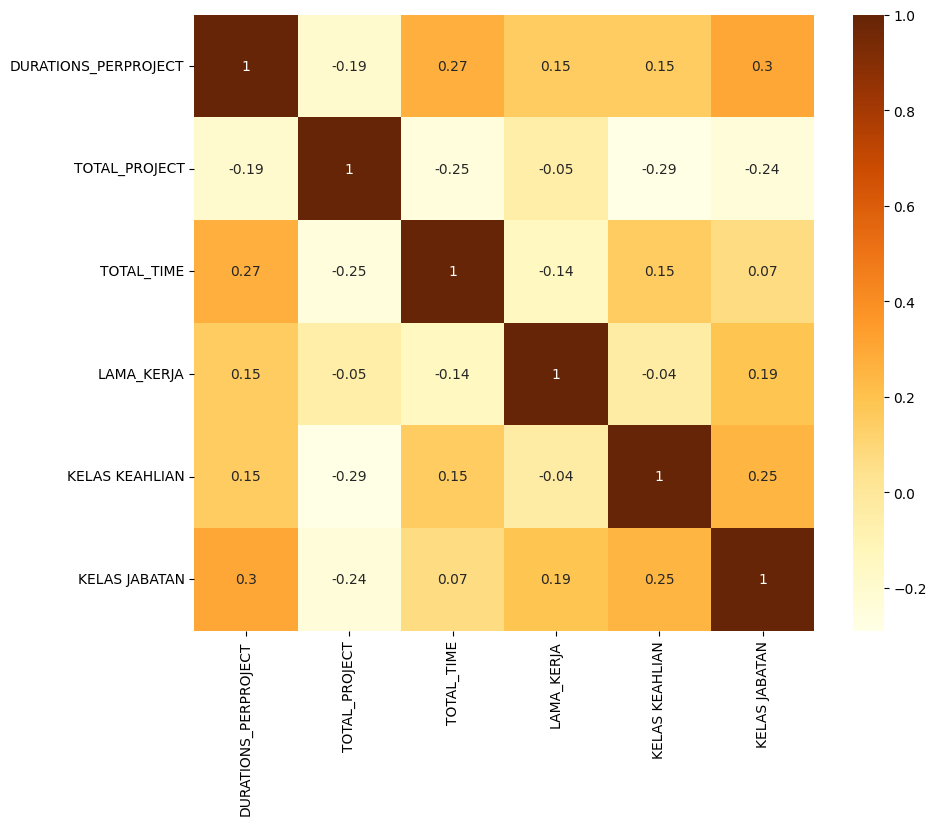

In [8]:
#seperating numerical from categorical data
datan= data2[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'TOTAL_TIME', 'LAMA_KERJA', 'KELAS KEAHLIAN', 'KELAS JABATAN']]
#correlation on numerical data
correl = datan.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(correl, annot = True, cmap = 'YlOrBr')

based on the correlation of numerical above, i guess we better drop the total time cause it's the same as total project and durations.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25308\1353170246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAMA', palette='Set2', data=datac)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25308\1353170246.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS', palette='Set2', data=datac)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25308\1353170246.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIVISI', palette='Set2', data=datac)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25308\1353170246.py:12: FutureWarni

<Axes: xlabel='JABATAN', ylabel='count'>

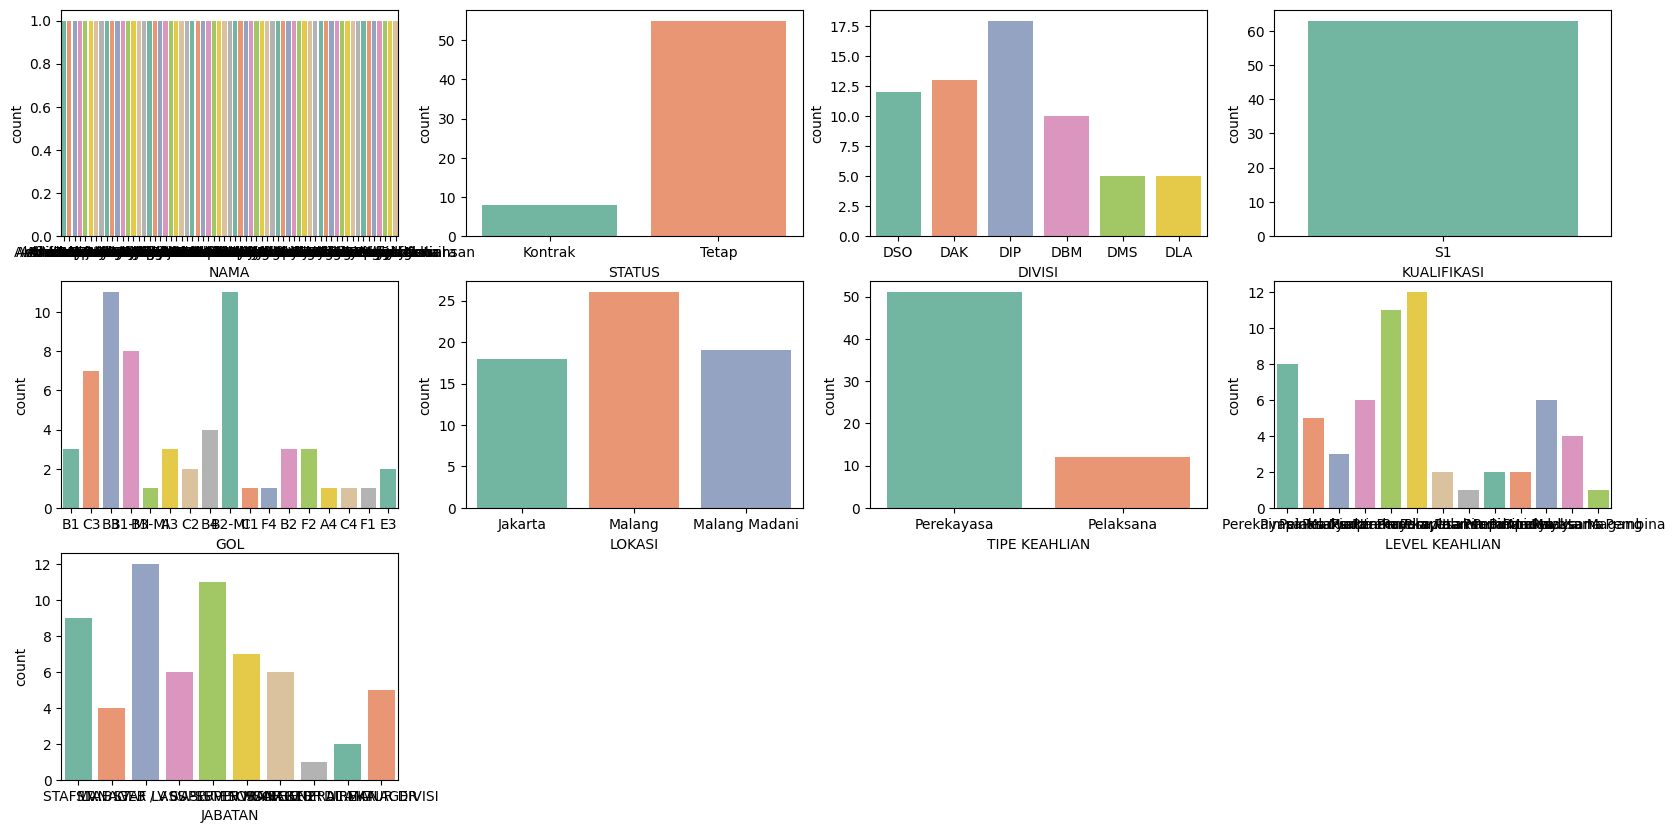

In [9]:
#seperating categorical from numerical data
datac= data[['NAMA', 'STATUS', 'DIVISI', 'KUALIFIKASI', 'GOL', 'LOKASI', 'TIPE KEAHLIAN', 'LEVEL KEAHLIAN', 'JABATAN']]
#correlation on categorical data
plt.figure(figsize = (20,10))
plt.subplot(3, 4, 1)
sns.countplot(x='NAMA', palette='Set2', data=datac)
plt.subplot(3, 4, 2)
sns.countplot(x='STATUS', palette='Set2', data=datac)
plt.subplot(3, 4, 3)
sns.countplot(x='DIVISI', palette='Set2', data=datac)
plt.subplot(3, 4, 4)
sns.countplot(x='KUALIFIKASI', palette='Set2', data=datac)
plt.subplot(3, 4, 5)
sns.countplot(x='GOL', palette='Set2', data=datac)
plt.subplot(3, 4, 6)
sns.countplot(x='LOKASI', palette='Set2', data=datac)
plt.subplot(3, 4, 7)
sns.countplot(x='TIPE KEAHLIAN', palette='Set2', data=datac)
plt.subplot(3, 4, 8)
sns.countplot(x='LEVEL KEAHLIAN', palette='Set2', data=datac)
plt.subplot(3, 4, 9)
sns.countplot(x='JABATAN', palette='Set2', data=datac)

from the graphs above, we can see and conclude that NAMA and KUALIFIKASI can be dropped coz they all are in the same freq. 

also can be concluded that there are 3 possible targets: TIPE KEAHLIAN, LEVEL KEAHLIAN, JABATAN

## Unused Feature

In [11]:
data2.head()

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,"8310,019",Tetap,16,DIP,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,5,MANAGER
6,Ahmad Nashruddin,1066.0,11.0,14329.0,190101,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,3,Perekayasa Utama,5,STAF LV. 3 / ASS. SUPERVISOR


In [12]:
data2= data2.drop(['NAMA', 'TOTAL_TIME', 'NIK', 'KUALIFIKASI', 'KELAS KEAHLIAN', 'KELAS JABATAN'], axis=1)

## Data CSV for 3 Attributes

In [13]:
data2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,TIPE KEAHLIAN,LEVEL KEAHLIAN,JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa,Perekayasa Madya,STAF LV. 3
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Perekayasa,Pimpinan Muda,MANAGER
4,29.0,3.0,Tetap,9,DIP,B3,Malang,Perekayasa,Pimpinan Pemula,STAF LV. 3 / ASS. SUPERVISOR
5,0.0,51.0,Tetap,16,DIP,C3,Malang,Perekayasa,Pimpinan Muda,MANAGER
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa,Perekayasa Utama,STAF LV. 3 / ASS. SUPERVISOR


In [14]:
#dataframe to CSV [TIPE KEAHLIAN]
dataTK= data2.drop(['LEVEL KEAHLIAN', 'JABATAN'], axis=1)
dataTK.to_csv(r"C:\Users\Lenovo\analyst_pkl\data\TIPE_KEAHLIAN.csv")

#dataframe to CSV [LEVEL KEAHLIAN]
dataLK= data2.drop(['TIPE KEAHLIAN', 'JABATAN'], axis=1)
dataLK.to_csv(r"C:\Users\Lenovo\analyst_pkl\data\LEVEL_KEAHLIAN.csv")

#dataframe to CSV [JABATAN]
dataJ= data2.drop(['LEVEL KEAHLIAN', 'TIPE KEAHLIAN'], axis=1)
dataJ.to_csv(r"C:\Users\Lenovo\analyst_pkl\data\JABATAN.csv")